# TensorFlow example

In this tutorial we're going to work through an example of integrating VisionCpp with TensorFlow.

## Getting Started
We assume that you have VisionCpp already installed. Import it using:

In [1]:
import visioncpp as vp

Initialize VisionCpp to your [ComputeCpp](https://www.codeplay.com/products/computesuite/computecpp) installation:

In [2]:
vp.init("~/ComputeCpp")

'/home/cec/ComputeCpp'

Then install TensorFlow. To install it, use:

In [3]:
!pip install --upgrade tensorflow

Requirement already up-to-date: tensorflow in /home/cec/visioncpp/lib/python3.5/site-packages
Requirement already up-to-date: protobuf>=3.1.0 in /home/cec/visioncpp/lib/python3.5/site-packages (from tensorflow)
Requirement already up-to-date: numpy>=1.11.0 in /home/cec/visioncpp/lib/python3.5/site-packages (from tensorflow)
Requirement already up-to-date: six>=1.10.0 in /usr/lib/python3/dist-packages (from tensorflow)
Requirement already up-to-date: wheel>=0.26 in /home/cec/visioncpp/lib/python3.5/site-packages (from tensorflow)
Requirement already up-to-date: setuptools in /home/cec/visioncpp/lib/python3.5/site-packages (from protobuf>=3.1.0->tensorflow)
Requirement already up-to-date: appdirs>=1.4.0 in /home/cec/visioncpp/lib/python3.5/site-packages (from setuptools->protobuf>=3.1.0->tensorflow)
Requirement already up-to-date: packaging>=16.8 in /home/cec/visioncpp/lib/python3.5/site-packages (from setuptools->protobuf>=3.1.0->tensorflow)
Requirement already up-to-date: pyparsing in 

import it using:

In [4]:
import tensorflow as tf

Finally, before we begin, import and configure our notebook:

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.image as mpimg
from PIL import Image
import matplotlib.pyplot as plt

## Loading the dataset

In [6]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


We can visualise a random element in the training data using:

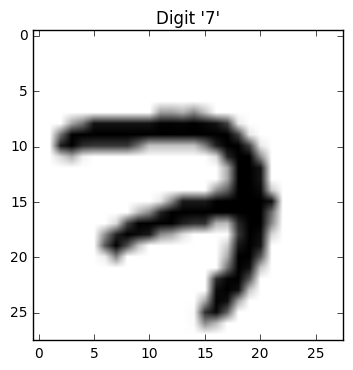

In [7]:
def show_digit(x, y):
    d = np.array(x)
    d *= 255
    
    data = d.astype(np.uint8)
    white = [255] * len(d)
    pixels = np.array(white - data, dtype="uint8").reshape((28, 28))
    
    plt.imshow(pixels, cmap="gray")
    plt.title("Digit '{}'".format(np.argmax(y)))

x, y = mnist.train.next_batch(100)
show_digit(x[0], y[0])

## The TensorFlow model

In [8]:
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [9]:
y = tf.nn.softmax(tf.matmul(x, W) + b)

## Training

In [10]:
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [11]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(128)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

In [12]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print("Accuracy: {:.2%}".format(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})))

Accuracy: 92.02%
